In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from matplotlib.dates import DateFormatter, DayLocator
import datetime as dt
import seaborn as sns

sns.set()

In [2]:
#Import data
df = pd.read_csv(r"C:\Users\arnav\OneDrive - OnTheHub - The University of Oxford\Documents\Coding, Summer 2020\Google Fit\Daily Summaries.csv", parse_dates=["Date"], index_col=["Date"])

#Initialize variables
#Get dates as index of DataFrame
dates = (df.index).date #format: yyyy-mm-dd
steps = df["Step count"]
cal = df["Calories (kcal)"]

movemin = df["Move Minutes count"].fillna(0)
heartpts = df["Heart Points"].fillna(0)

In [3]:
#Get basic summary of different columns
df.describe()

,Calories (kcal),Distance (m),Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,...,Min weight (kg),Move Minutes count,Heart Points,Heart Minutes,Cycling duration (ms),Inactive duration (ms),Walking duration (ms),Running duration (ms),Table tennis duration (ms),Tennis duration (ms)
count,413.000000,413.000000,386.000000,386.000000,386.000000,386.000000,413.000000,413.000000,413.000000,413.000000,...,31.000000,412.000000,381.000000,381.000000,2.400000e+01,4.130000e+02,4.130000e+02,9.300000e+01,1.0,1.0
mean,1970.015847,6410.455984,41.433929,32.425895,41.617799,32.691592,1.034544,9.864163,0.205480,9702.244552,...,68.348387,110.432039,47.435696,47.013123,1.305178e+06,7.513825e+07,6.302984e+06,1.842260e+05,1920000.0,1920000.0
std,170.864462,3496.361403,11.933473,38.830148,11.782976,38.823341,0.590001,17.252261,0.092339,4613.476726,...,2.366836,49.672531,37.831819,37.537803,1.231410e+06,4.795816e+06,2.896163e+06,1.905717e+05,NaN,NaN
min,1621.507926,119.463672,12.972948,-1.279739,13.099371,-1.264363,0.403813,1.097265,0.000000,339.000000,...,65.599998,2.000000,1.000000,1.000000,7.364000e+03,5.234797e+07,4.041680e+05,3.011700e+04,1920000.0,1920000.0
25%,1856.100701,3962.865271,28.413849,-1.264515,28.418365,-1.254465,0.705089,3.045059,0.125261,6566.000000,...,66.199997,74.000000,13.000000,13.000000,5.877172e+05,7.293078e+07,4.221853e+06,6.418500e+04,1920000.0,1920000.0
50%,1966.622175,6223.065002,51.745797,-1.261618,51.770401,-1.234052,0.857281,4.450000,0.252547,9714.000000,...,67.000000,111.000000,43.000000,43.000000,7.013090e+05,7.577955e+07,6.376688e+06,1.047580e+05,1920000.0,1920000.0
75%,2070.385743,8350.469164,51.754255,77.057533,51.776551,77.065724,1.128572,7.525685,0.260272,12324.000000,...,70.250000,143.000000,71.000000,70.000000,1.830048e+06,7.825371e+07,8.237909e+06,2.211100e+05,1920000.0,1920000.0
max,2571.309062,18034.115760,51.776972,77.570221,51.788050,77.710681,5.430124,113.000000,0.358712,24793.000000,...,74.000000,263.000000,181.000000,181.000000,4.587230e+06,8.457320e+07,1.755463e+07,1.067535e+06,1920000.0,1920000.0


In [5]:
#Summary of data
n = len(dates) #number of data points
print(str(n) + " days worth of data\n")

#Steps
mean_steps = steps.mean()
std_steps = np.std(steps, ddof=1)

print("Steps:")
print("Average number of daily steps = (" + str(round(mean_steps, 1)) + " ± " + str(round(std_steps/np.sqrt(n), 1)) + ") steps" )
#using standard error on the mean for the margin of error

maxstep_date = df[steps==max(steps)].index[0]
print("Maximum = " + str(max(steps)) + " steps [on " + str(maxstep_date) + "]")

minstep_date = df[steps==min(steps)].index[0]
print("Minimum = " + str(min(steps)) + " steps [on " + str(minstep_date) + "]")

print("Standard deviation = " + str(round(std_steps, 1)) + " steps\n")

#Calories
mean_cal = cal.mean()
std_cal = np.std(cal, ddof=1)

print("Calories:")
print("Average daily calorie count = (" + str(round(mean_cal, 1)) + " ± " + str(round(std_cal/np.sqrt(n), 1)) + ") kcal" )
#using standard error on the mean for the margin of error

maxcal_date = df[cal==max(cal)].index[0]
print("Maximum = " + str(round(max(cal), 1)) + " kcal [on " + str(maxcal_date) + "]")

mincal_date = df[cal==min(cal)].index[0]
print("Minimum = " + str(round(min(cal), 1)) + " kcal [on " + str(mincal_date) + "]")

print("Standard deviation = " + str(round(std_cal, 1)) + " kcal")


413 days worth of data

Steps:
Average number of daily steps = (9702.2 ± 227.0) steps
Maximum = 24793 steps [on 2020-03-03 00:00:00]
Minimum = 339 steps [on 2020-02-15 00:00:00]
Standard deviation = 4613.5 steps

Calories:
Average daily calorie count = (1970.0 ± 8.4) kcal
Maximum = 2571.3 kcal [on 2020-05-07 00:00:00]
Minimum = 1621.5 kcal [on 2020-02-15 00:00:00]
Standard deviation = 170.9 kcal


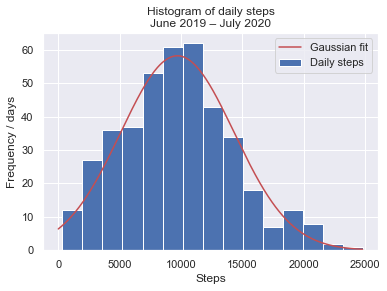

In [6]:
#Histogram of daily steps

bins = 15 #number of bins
plt.hist(steps, bins=bins, normed=False, label="Daily steps")
plt.title("Histogram of daily steps\nJune 2019 – July 2020")
plt.ylabel("Frequency / days")
plt.xlabel("Steps")

dx = (max(steps)-min(steps))/bins #width of the bins (in terms of steps)

#Gaussian fit
x = np.linspace(0, max(steps), 1000) #x-array

N = n*dx #normalisation factor for the Gaussian

fit1 = N*norm.pdf(x, loc=mean_steps, scale=std_steps)
#fit2 = t.pdf(x, n-1, loc=mean_steps, scale=std_steps)

plt.plot(x, fit1, "r-", label="Gaussian fit")
#plt.plot(x, fit2, "g-", label="Student's t-distribution")
plt.legend()


plt.show()

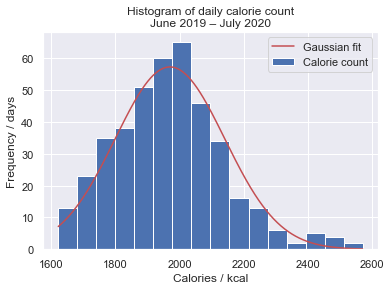

In [7]:
#Histogram of daily calorie count

bins = 16
plt.hist(cal, bins=bins, normed=False, label="Calorie count")
plt.title("Histogram of daily calorie count\nJune 2019 – July 2020")
plt.ylabel("Frequency / days")
plt.xlabel("Calories / kcal")

dx = (max(cal)-min(cal))/bins

x = np.linspace(min(cal), max(cal), 1000)

N=n*dx

fit1 = N*norm.pdf(x, loc=mean_cal, scale=std_cal)
#fit2 = t.pdf(x, n-1, loc=mean_steps, scale=std_steps)

plt.plot(x, fit1, "r-", label="Gaussian fit")
#plt.plot(x, fit2, "g-", label="Student's t-distribution")
plt.legend()

plt.show()

Pearson's correlation coefficient = 0.89 [p = 1.7743702790124516e-142]

Spearman's correlation coefficient = 0.886 [p = 2.3213142327714923e-139]



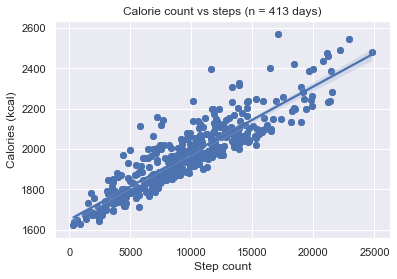

In [8]:
#Basic correlation analysis
#Correlation between steps and calorie count

from scipy.stats import pearsonr, spearmanr

pcov, p_pearson = pearsonr(steps, cal)
scov, p_spearman = spearmanr(steps, cal)


#Pearson: used for linearly-interdependent variables
print("Pearson's correlation coefficient = " + str(round(pcov, 3)) + " [p = " + str(p_pearson) + "]\n")

#Spearman: used for monotonically-changing variable relationships (can be non-linear)
print("Spearman's correlation coefficient = " + str(round(scov, 3)) + " [p = " + str(p_spearman) + "]\n")

plt.scatter(steps, cal, label="Actual data")
plt.title("Calorie count vs steps (n = " + str(n) + " days)")
plt.xlabel("Steps")
plt.ylabel("Calories / kcal")

sns.regplot(steps, cal, label="Regression line") #regression line

plt.show()

Text(0.5, 1, 'Correlation matrix')

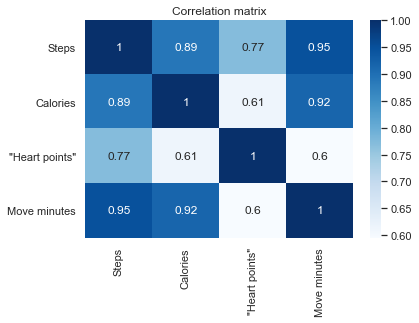

In [9]:
#Covariance matrix

import seaborn as sns

d = {"Steps": steps,
"Calories": cal,
'"Heart points"': heartpts,
"Move minutes": movemin}

X = pd.DataFrame(d)
Xcov = X.corr()

ax = sns.heatmap(Xcov, cmap="Blues", annot=True)
plt.yticks(rotation=0)

plt.title("Correlation matrix")


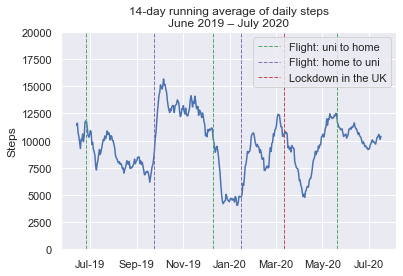

In [16]:
#14-day running average
#plt.plot(dates, steps)
steps_ra = steps.rolling(14).mean()

date_form = DateFormatter("%b-%y")

fig, ax = plt.subplots()
plt.plot(steps_ra)
plt.title("14-day running average of daily steps\nJune 2019 – July 2020")
plt.ylabel("Steps")
plt.ylim(0, 20000)

#Set vertical lines corresponding to flights from home to university!
plt.axvline(dt.datetime(2019, 6, 26), color="g", linestyle="--", linewidth=1, label="Flight: uni to home")
plt.axvline(dt.datetime(2019, 9, 24), color="m", linestyle="--", linewidth=1, label="Flight: home to uni")
plt.axvline(dt.datetime(2019, 12, 10), color="g", linestyle="--", linewidth=1)
plt.axvline(dt.datetime(2020, 1, 15), color="m", linestyle="--", linewidth=1)
plt.axvline(dt.datetime(2020, 3, 12), color="r", linestyle="--", linewidth=1, label="Lockdown in the UK")
plt.axvline(dt.datetime(2020, 5, 21), color="g", linestyle="--", linewidth=1)

plt.legend()

ax.xaxis.set_major_formatter(date_form)
